# 1. Importação de Bibliotecas e Dados

In [1]:
# Todas bibliotecas utilizadas no projeto são importadas no começo

# manipulação e processamento de dados
import pandas as pd
import numpy as np

# Visualização de dados e imagens
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Pipeline e algorítmos de machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Ajuste fino e avaliação do modelo
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# Esconder avisos de sistema
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
# leitura dos csv baixados
train = pd.read_csv('./data/database_fires.csv')
test = pd.read_csv('./data/respostas.csv')

#### Descrição dos Arquivos

- **database_fires.csv** - Nossa base de treino
- **resposta.csv** - Arquivo para a avaliar o modelo com dados não vistos anteriormente e gerar o arquivo de submissão das respostas

# 2. Junção das bases de dados

In [3]:
#train = train.dropna()

# Junção de todos os dados em um arquivo
ntrain = train.shape[0]
ntest = test.shape[0]

# Criação da variável y_train; será utilizada na modelagem
y_train = train['fires'].values

# Salvando o ID do incêndio pronto para o envio do arquivo no final
fireId = test['id']

# Criação do dataset concatenado
data = pd.concat((train, test))

# Print do shape do dataset
print("O tamanho dos dados é: {}".format(data.shape))

O tamanho dos dados é: (296109, 14)


# 3. Inspeção Inicial

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296109 entries, 0 to 44341
Data columns (total 14 columns):
altitude            296109 non-null float64
data                296109 non-null object
estacao             296109 non-null int64
estado              296109 non-null object
evaporacao_piche    199124 non-null float64
fires               251767 non-null float64
id                  296109 non-null int64
insolacao           246499 non-null float64
precipitacao        294354 non-null float64
temp_comp_med       245931 non-null float64
temp_max            263789 non-null float64
temp_min            282145 non-null float64
umidade_rel_med     255832 non-null float64
vel_vento_med       243664 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 33.9+ MB


#### Descrição dos Campos

- **id**- id único para cada registro
- **estado** - estado cujos dados foram extraídos
- **estacao** - indicador aleatório e único para cada região de aquisição dos dados
- **data** - data de observação dos dados
- **precipitacao** - dados de precipitação [mm]
- **temp_max** - dados de temperatura máxima observada no dia [°C]
- **temp_min** - dados de temperatura mínima observada no dia [°C]
- **insolacao** - período de tempo em que houve irradiação solar sobre superfície [horas]
- **evaporacao_piche** - medida de evaporação [mm]
- **temp_comp_med** - temperatura compensada média [°C]
- **umidade_rel_med** - umidade relativa média [%]
- **vel_vento_med** - velocidade média do vento [m/s]
- **altitude** - altitude do local de medição [m]
- **fires** - variável booleana que indica se houve incêndio no dia ou não

In [5]:
# Inspecionando as 5 primeiras linhas
data.head()

,altitude,data,estacao,estado,evaporacao_piche,fires,id,insolacao,precipitacao,temp_comp_med,temp_max,temp_min,umidade_rel_med,vel_vento_med
0,170.0,01/01/2016,50484,AC,NaN,0.0,1,2.3,NaN,NaN,31.4,NaN,96.0,0.00000
1,170.0,02/01/2016,50484,AC,NaN,0.0,2,4.4,0.0,26.44,32.5,23.3,95.0,0.51444
2,170.0,03/01/2016,50484,AC,NaN,0.0,3,0.6,35.2,25.78,30.5,24.0,97.0,0.51444
3,170.0,04/01/2016,50484,AC,NaN,0.0,4,2.0,60.2,25.94,31.7,22.3,96.0,0.00000
4,170.0,05/01/2016,50484,AC,NaN,0.0,5,0.1,28.4,25.04,28.5,23.0,95.0,0.00000


In [6]:
# Estatísticas descritivas do dataset
data.describe()

,altitude,estacao,evaporacao_piche,fires,id,insolacao,precipitacao,temp_comp_med,temp_max,temp_min,umidade_rel_med,vel_vento_med
count,296109.000000,296109.000000,199124.000000,251767.000000,296109.000000,246499.000000,294354.000000,245931.000000,263789.000000,282145.000000,255832.000000,243664.000000
mean,386.328757,55137.881010,4.533419,0.252201,148055.000000,6.781701,3.802912,24.662601,30.872810,19.856248,72.857076,1.728413
std,330.981325,25548.634349,3.387488,0.434277,85479.449767,3.397632,10.730024,4.092109,4.522093,4.262457,14.349557,1.325386
min,1.840000,10056.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.840000,2.400000,-7.000000,4.000000,0.000000
25%,79.500000,33121.000000,2.100000,0.000000,74028.000000,4.300000,0.000000,22.680000,28.700000,17.700000,63.750000,0.685920
50%,286.300000,55571.000000,3.600000,0.000000,148055.000000,7.700000,0.000000,25.660000,31.600000,20.800000,75.250000,1.400000
75%,648.000000,76275.000000,6.000000,1.000000,222082.000000,9.600000,1.400000,27.460000,33.900000,23.000000,83.750000,2.450000
max,1642.000000,99809.000000,28.800000,1.000000,296109.000000,14.900000,234.400000,35.040000,43.900000,30.800000,100.000000,15.433200


,Total,Porcentagem,Total_train,Porcentagem_train,Total_test,Porcentagem_test
evaporacao_piche,96985.0,0.327531,73571,0.292219,23414.0,0.528032
vel_vento_med,52445.0,0.177114,43310,0.172024,9135.0,0.206012
temp_comp_med,50178.0,0.169458,41838,0.166177,8340.0,0.188084
insolacao,49610.0,0.167540,40549,0.161058,9061.0,0.204344
umidade_rel_med,40277.0,0.136021,32823,0.130371,7454.0,0.168102
temp_max,32320.0,0.109149,26894,0.106821,5426.0,0.122367
temp_min,13964.0,0.047158,11588,0.046027,2376.0,0.053584
precipitacao,1755.0,0.005927,1407,0.005589,348.0,0.007848


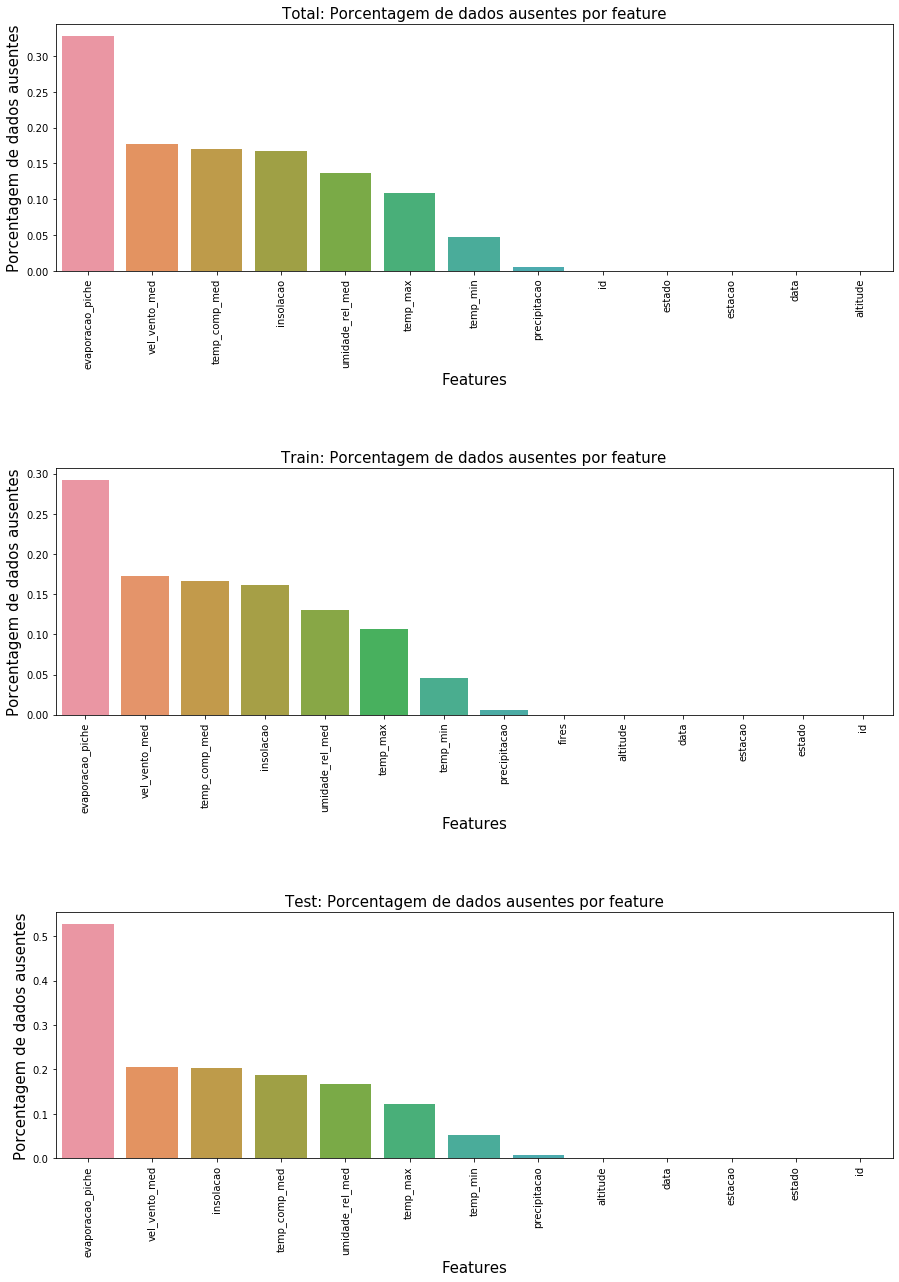

In [7]:
# Quantidade de NaN para cada feature do dataset

# Total
temp = data.drop(columns=['fires'])
total = temp.isnull().sum().sort_values(ascending=False)
porcentagem = (temp.isnull().sum()/temp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
missing_data1= missing_data
# Gráfico
fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot(3,1,1)
ax1 = sns.barplot(x=missing_data.index, y=missing_data['Porcentagem'])
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Features', fontsize=15)
ax1.set_ylabel('Porcentagem de dados ausentes', fontsize=15)
ax1.set_title('Total: Porcentagem de dados ausentes por feature', fontsize=15)

# Train
total = train.isnull().sum().sort_values(ascending=False)
porcentagem = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentagem], axis=1, keys=['Total_train', 'Porcentagem_train'])
missing_data2 = missing_data
# Gráfico
ax2 = plt.subplot(3,1,2)
ax2 = sns.barplot(x=missing_data.index, y=missing_data['Porcentagem_train'])
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel('Features', fontsize=15)
ax2.set_ylabel('Porcentagem de dados ausentes', fontsize=15)
ax2.set_title('Train: Porcentagem de dados ausentes por feature', fontsize=15)

# Test
total = test.isnull().sum().sort_values(ascending=False)
porcentagem = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentagem], axis=1, keys=['Total_test', 'Porcentagem_test'])
missing_data3 = missing_data
# Gráfico
ax3 = plt.subplot(3,1,3)
ax3 = sns.barplot(x=missing_data.index, y=missing_data['Porcentagem_test'])
ax3.tick_params(axis='x', rotation=90)
ax3.set_xlabel('Features', fontsize=15)
ax3.set_ylabel('Porcentagem de dados ausentes', fontsize=15)
ax3.set_title('Test: Porcentagem de dados ausentes por feature', fontsize=15)

# Ajuste dos gráficos
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.7, wspace=None, hspace=0.8)

# Exibição do dataframe
missing = pd.concat([missing_data1, missing_data2, missing_data3], axis=1)
missing = missing.drop('fires').sort_values(by=['Porcentagem'], ascending= False)
missing[missing['Porcentagem'] != 0]

# 4. Análise Exploratória de Dados

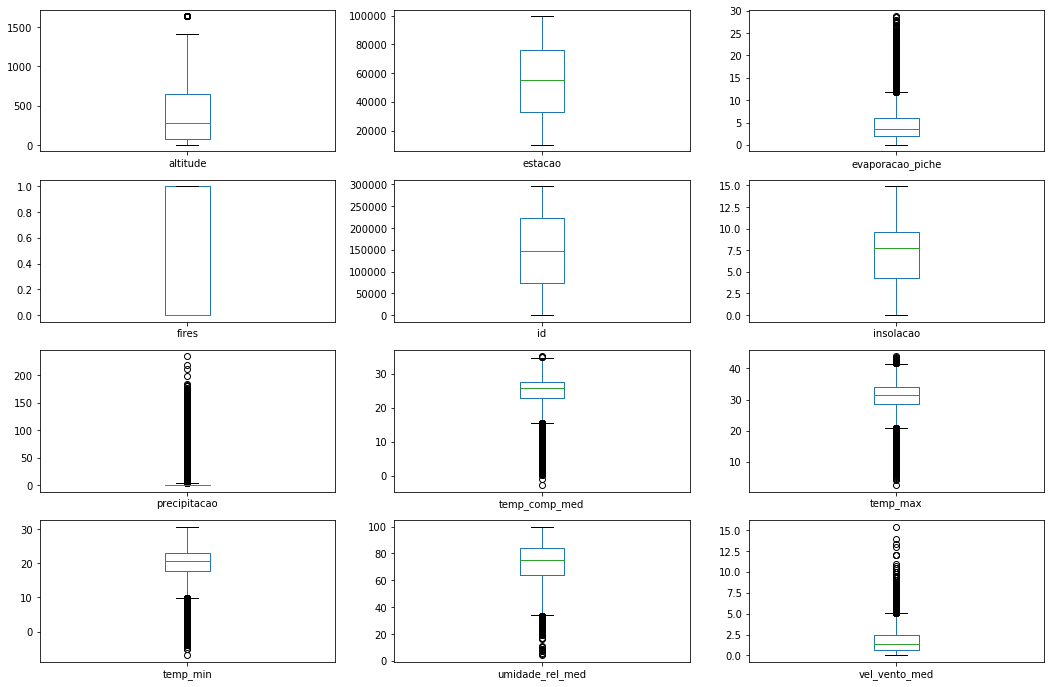

In [8]:
# Boxplot para visualização de outliers
data.plot(kind='box', figsize=(18,12),subplots=True, layout=(4, 3));

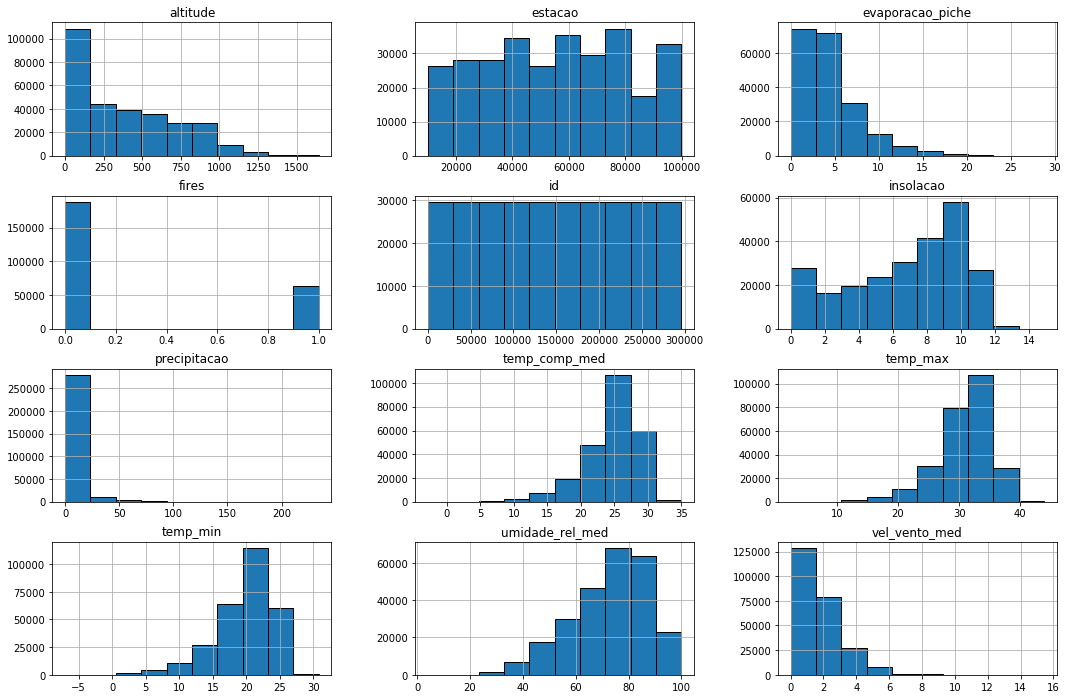

In [9]:
# Histograma dos dados
data.hist(figsize=(18,12), layout = (4,3), ec='k');

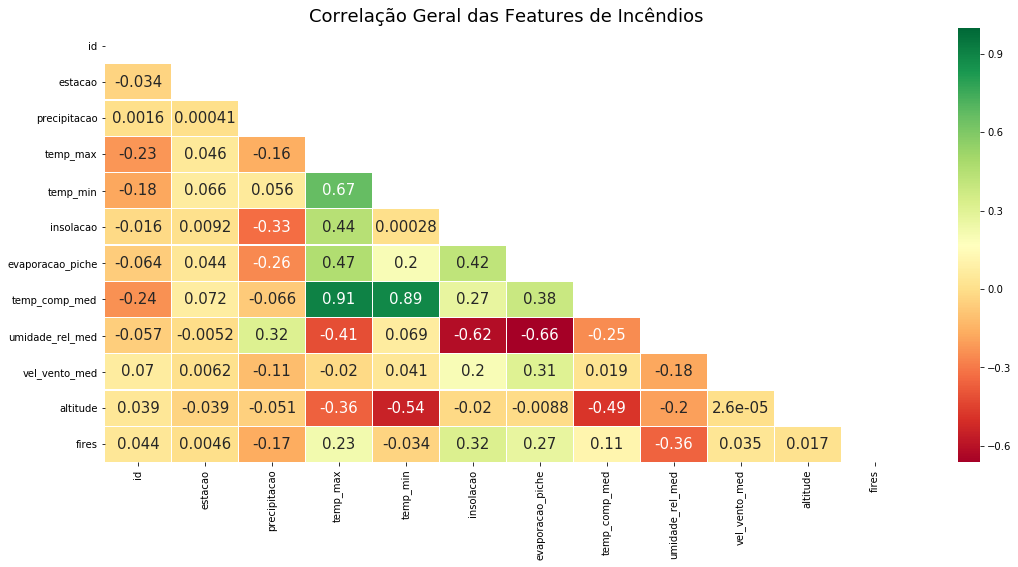

In [10]:
# Início da Matriz de correlação
corr = train.corr()
# Máscara
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Imagem
plt.figure(figsize=(18, 8))
# Título
plt.title('Correlação Geral das Features de Incêndios', fontsize=18)
# Matriz de correlação
_ = sns.heatmap(corr, mask=mask, annot=True,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':15})

#### Fires

0    188271
1     63496
Name: fires, dtype: int64


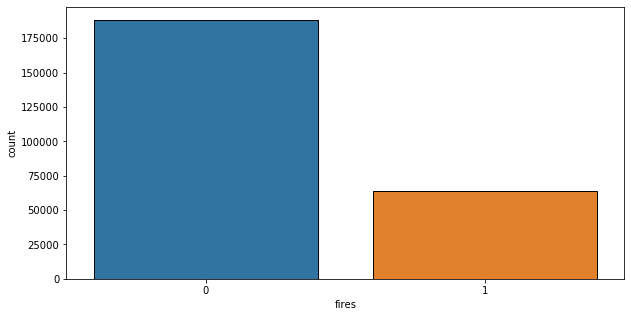

In [11]:
# Plot de fires
fig = plt.figure(figsize = (10,5))
sns.countplot(x='fires', data = train, ec = 'k')
print(train['fires'].value_counts())

#### Estado

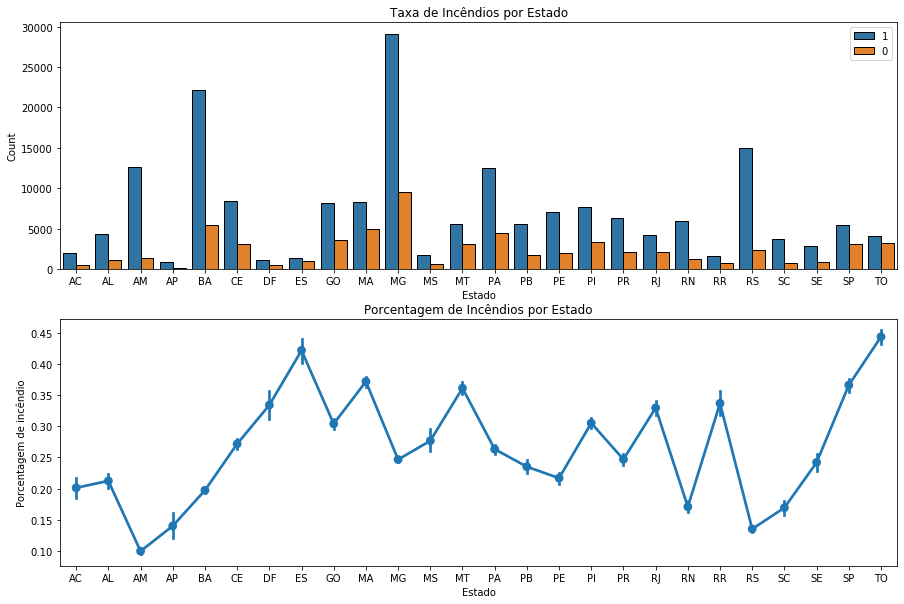

In [12]:
fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'estado', hue = 'fires', data = train, ec = 'k')
ax1.set_title('Taxa de Incêndios por Estado')
ax1.set_xticklabels(train['estado'].unique())
ax1.set_xlabel('Estado')
ax1.set_ylabel('Count')
ax1.legend([1, 0])

# Pointplot Pclass type
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='estado', y='fires', data=train)
ax2.set_xlabel('Estado')
ax2.set_ylabel('Porcentagem de incêndio')
_ = ax2.set_title('Porcentagem de Incêndios por Estado')

#### Estação

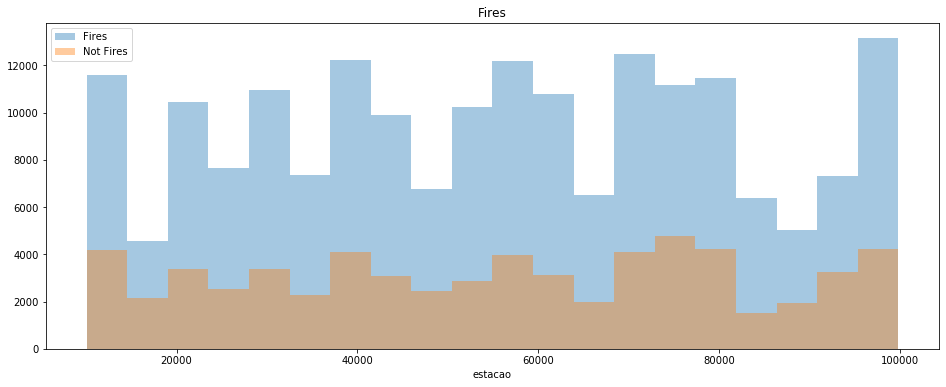

In [13]:
# Histograma de estações em função de incêndios
fig = plt.figure(figsize=(16, 6))
ax = sns.distplot(train[train['fires']==0].estacao, bins=20, label = 'Fires', kde =False)
ax = sns.distplot(train[train['fires']==1].estacao, bins=20, label = 'Not Fires', kde =False)
ax.legend()
_ = ax.set_title('Fires')
plt.show()

#### Data

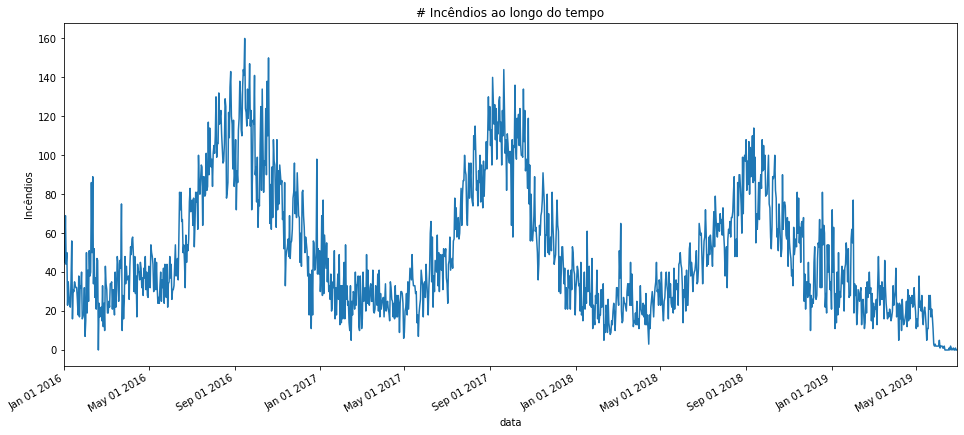

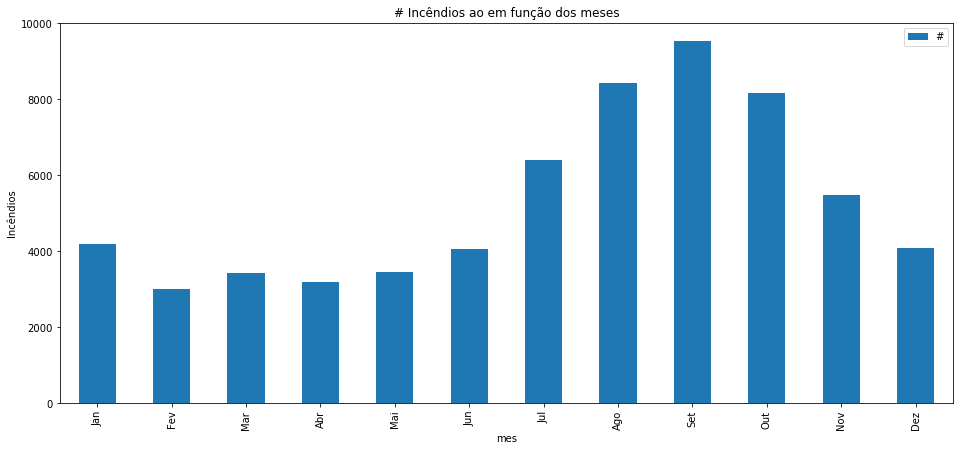

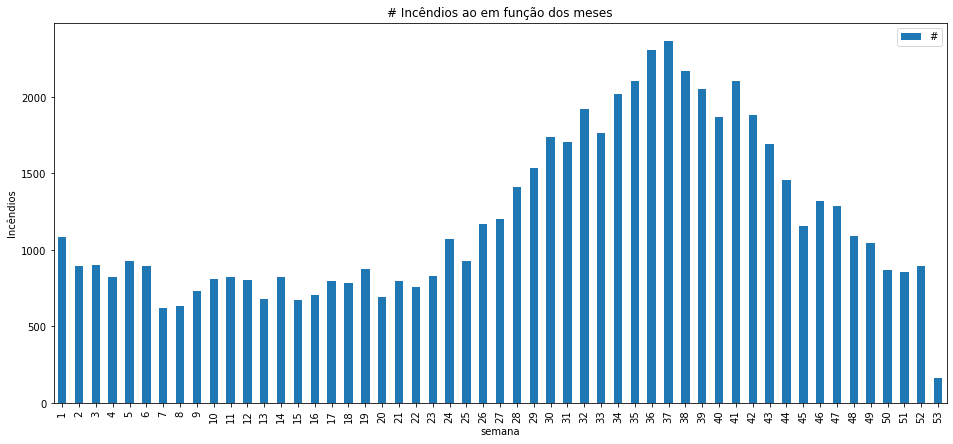

In [14]:
# Agrupando a soma de incêndios por data
datas = train.groupby(['data']).sum()
datas = datas[['fires']]
datas.index = pd.to_datetime(datas.index, format='%d/%m/%Y')
datas['ano'] = datas.index.year
datas['mes'] = datas.index.month
datas['semana'] = datas.index.week
# datas['semana'] = datas['semana'].replace(53, 1)
fig, ax = plt.subplots(figsize=(16,7))
datas.fires.plot(ax=ax)
ax.set(title='# Incêndios ao longo do tempo', ylabel= 'Incêndios')
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))

# Mensal
fig, ax = plt.subplots(figsize=(16,7))
datas.groupby(['mes']).sum()[['fires']].plot(kind='bar', ax=ax)
ax.legend(labels='#')
_ = ax.set(title='# Incêndios ao em função dos meses', ylabel= 'Incêndios', label='# Incêndios', xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Semanal
fig, ax = plt.subplots(figsize=(16,7))
datas.groupby(['semana']).sum()[['fires']].plot(kind='bar', ax=ax)
ax.legend(labels='#')
_ = ax.set(title='# Incêndios ao em função dos meses', ylabel= 'Incêndios', label='# Incêndios')

#### Precipitação

#### Temp_max e Temp_min

#### insolação

#### Evaporacao_piche

#### Temp_comp_med

#### Umidade_rel_med

#### Vel_vento_med

#### Umidade_rel_med

#### Altitude

# 5. Feature engineering

- *Ainda falta preencher os valores nulos de cada variável*

- *Como vamos fazer com outliers?*

#### Data

In [15]:
# Quebra de data em dia, mês e ano para efeitos de sazonalidade

data.data = pd.to_datetime(data.data, format='%d/%m/%Y')
data['ano'] = data.data.dt.year
data['mes'] = data.data.dt.month
data['semana'] = data.data.dt.week
data['dia'] = data.data.dt.day

# Correção semana 53
# data['semana'] = data['semana'].replace(53, 1)

#### Estado

In [16]:
# Dicionário de latitude e longitude médias para cada estado
dict_estados_lat_long = {'AC': [ -8.77, -70.55], 'AL': [ -9.71, -35.73], 'AM': [ -3.07, -61.66], 'AP': [  1.41, -51.77]
, 'BA': [-12.96, -38.51], 'CE': [ -3.71, -38.54], 'DF': [-15.83, -47.86], 'ES': [-19.19, -40.34], 'GO': [-16.64, -49.31]
, 'MA': [ -2.55, -44.30], 'MT': [-12.64, -55.42], 'MS': [-20.51, -54.54], 'MG': [-18.10, -44.38], 'PA': [ -5.53, -52.29]
, 'PB': [ -7.06, -35.55], 'PR': [-24.89, -51.55], 'PE': [ -8.28, -35.07], 'PI': [ -8.28, -43.68], 'RJ': [-22.84, -43.15]
, 'RN': [ -5.22, -36.52], 'RO': [-11.22, -62.80], 'RS': [-30.01, -51.22], 'RR': [  1.89, -61.22], 'SC': [-27.33, -49.44]
, 'SE': [-10.90, -37.07], 'SP': [-23.55, -46.64], 'TO': [-10.25, -48.25]}

# Latitude e longitude
data['lat'] = data['estado'].apply(lambda row: dict_estados_lat_long[row][0])
data['long'] = data['estado'].apply(lambda row: dict_estados_lat_long[row][1])

#### Valores faltantes

In [17]:
# Preenchimento de dados faltantes

missing_columns = missing[missing['Total']!=0].index.tolist()[::-1]
missing_columns

# Preenchimento de dados faltantes
imputer = IterativeImputer()
imputedData = imputer.fit_transform(data.drop(['fires', 'data', 'estado'], axis=1))
data_final = pd.DataFrame(imputedData, columns=list(data.drop(['fires', 'data', 'estado'], axis=1).columns))
data_filled = pd.merge(data_final, data[['fires', 'data', 'estado', 'id']], how='left', on=['id'])

#### Temperatura

In [18]:
# Dropar temp_cond_media devido à alta correlacao com outras features
data_filled = data_filled.drop(columns=['temp_comp_med'])

# Feature variação de temperatura
data_filled['delta_temp'] = data_filled['temp_max'] - data_filled['temp_min']

#### Dataset Final

In [19]:
# Versão final dos dados
data_filled.head()

,altitude,estacao,evaporacao_piche,id,insolacao,precipitacao,temp_max,temp_min,umidade_rel_med,vel_vento_med,ano,mes,semana,dia,lat,long,fires,data,estado,delta_temp
0,170.0,50484.0,-0.501407,1.0,2.3,10.574237,31.4,21.994711,96.0,0.00000,2016.0,1.0,53.0,1.0,-8.77,-70.55,0.0,2016-01-01,AC,9.405289
1,170.0,50484.0,0.008494,2.0,4.4,0.000000,32.5,23.300000,95.0,0.51444,2016.0,1.0,53.0,2.0,-8.77,-70.55,0.0,2016-01-02,AC,9.200000
2,170.0,50484.0,-0.482843,3.0,0.6,35.200000,30.5,24.000000,97.0,0.51444,2016.0,1.0,53.0,3.0,-8.77,-70.55,0.0,2016-01-03,AC,6.500000
3,170.0,50484.0,-1.590033,4.0,2.0,60.200000,31.7,22.300000,96.0,0.00000,2016.0,1.0,1.0,4.0,-8.77,-70.55,0.0,2016-01-04,AC,9.400000
4,170.0,50484.0,-1.305703,5.0,0.1,28.400000,28.5,23.000000,95.0,0.00000,2016.0,1.0,1.0,5.0,-8.77,-70.55,0.0,2016-01-05,AC,5.500000


In [20]:
# Dropa coluna com resultado
data_filled = data_filled.drop(['fires'], axis=1)

In [21]:
# Dropando as colunas que não serão utilizadas pelos modelos de ML
data_filled = data_filled.drop(['id', 'data', 'estado', 'estacao'], axis=1)

In [22]:
# Convertendo colunas para economia de espaço
data_filled[['semana', 'mes', 'umidade_rel_med', 'dia', 'ano']] = data_filled[['semana', 'mes', 'umidade_rel_med', 'dia', 'ano']].astype('int8')
data_filled[['evaporacao_piche', 'insolacao', 'precipitacao', 'temp_max', 'temp_min', 'vel_vento_med', 'lat', 'long', 'delta_temp']] = data_filled[['evaporacao_piche', 'insolacao', 'precipitacao', 'temp_max', 'temp_min', 'vel_vento_med', 'lat', 'long', 'delta_temp']].astype('float16')

# 6. Machine Learning

In [23]:
# Retorno para os sets de treino e teste
train = data_filled[:ntrain]
test = data_filled[ntrain:]

In [24]:
# Setando features e variável objetivo no set de treino
X_test = test
X_train = train

# Escalando dados para ajudar no modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Round 1: Modelos Iniciais

In [ ]:
# Início de 10 modelos de classificação
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
# gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Preparação das listas
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, bag]         
scores = []

# Fit sequencial e validação cruzada dos modelos
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

In [ ]:
# Criando a tabela de resultados, classificada da maior para a menor
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

In [ ]:
# Plot dos resultados
plt.figure(figsize=(14,6))
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
_ = plt.xlim(0.80, 1.0)

In [ ]:
# Função para novo gráfico
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=6, aspect=2)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # Um título diferente para cada eixo
        ax.set(title=title)
    # Grid horizontal
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [ ]:
# Colocando a importância das features no dataframe
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [ ]:
# Criação do título do gráfico
titles = ['As features mais importantes na predição de incêndios: XGBoost']

# Plotando o gráfico
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [ ]:
# Building feature importance into a DataFrame
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [ ]:
# Creating graph title
titles = ['As features mais importantes na predição de incêndios: Logistic Regression']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

#### Round 2: Seleção de Features

In [ ]:
# Getting feature importances for the 5 models where we can
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# Merging results into a single dataframe
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Calculating average importance per feature
importances['Average'] = importances.mean(axis=1)

# Ranking top to bottom
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Display
importances

In [ ]:
# Building feature importance into a DataFrame
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [ ]:
# Creating graph title
titles = ['As features mais importantes na predição de incêndios: média de 5 modelos']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

*Rever features a serem dropadas na célula abaixo (features < 0.05)*

In [ ]:
# Drop redundant features
train = train.drop(['Embarked', 'Cabin'], axis=1)
test = test.drop(['Embarked', 'Cabin'], axis=1)

# Re-build model variables
X_train = train
X_test = test

# Transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Retreino dos modelos

In [ ]:
# Initiate models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v2.append(acc.mean())

In [ ]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

In [ ]:
# Plot results
plt.figure(figsize=(14,6))
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
_ = plt.xlim(0.80, 0.86)

#### Round 3: Ajuste de hiperparâmetros do modelo

##### SVC

In [ ]:
# Parameter's to search
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# Setting up parameter grid
hyperparams = {'C': Cs, 'gamma' : gammas}

# Run GridSearch CV
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Gradient Boosting Classifier

In [ ]:
# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Logistic Regression

In [ ]:
# Parameter's to search
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Setting up parameter grid
hyperparams = {'penalty': penalty, 'C': C}

# Run GridSearch CV
gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### XGBoost

In [ ]:
# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.9),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Gaussian Process

In [ ]:
# Parameter's to search
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

# Setting up parameter grid
hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

# Run GridSearch CV
gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Adaboost

In [ ]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Run GridSearch CV
gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### K Nearest Neighbours

In [ ]:
# Parameter's to search
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Random Forest

In [ ]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Extra Trees

In [ ]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Bagging Classifier

In [ ]:
# Parameter's to search
n_estimators = [10, 15, 20, 25, 50, 75, 100, 150]
max_samples = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 50]
max_features = [1, 3, 5, 7]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

# Run GridSearch CV
gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

##### Retreino do modelo

In [ ]:
# Initiate tuned models
ran = RandomForestClassifier(n_estimators=25,
                             max_depth=3, 
                             max_features=3,
                             min_samples_leaf=2, 
                             min_samples_split=8,  
                             random_state=1)

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=1, 
                           n_neighbors=5, 
                           weights='uniform')

log = LogisticRegression(C=2.7825594022071245,
                         penalty='l2')

xgb = XGBClassifier(learning_rate=0.0001, 
                    n_estimators=10,
                    random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.0005,
                                 n_estimators=1250,
                                 random_state=1)

svc = SVC(probability=True)

ext = ExtraTreesClassifier(max_depth=None, 
                           max_features=3,
                           min_samples_leaf=2, 
                           min_samples_split=8,
                           n_estimators=10,
                           random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, 
                         n_estimators=50,
                         random_state=1)

gpc = GaussianProcessClassifier()

bag = BaggingClassifier(random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []

# Fit & cross-validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())

In [ ]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2,
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

In [ ]:
# Plot results
plt.figure(figsize=(14,6))
sns.barplot(x='Score with tuned parameters', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
_ = plt.xlim(0.82, 0.86)

#### Round 4: Voting Classifier

In [ ]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv = 10)
grid_hard.fit(X_train, y_train)

#print("Hard voting on train set score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))

In [ ]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10)
grid_soft.fit(X_train, y_train)

#print("Soft voting on train set score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))

# 7. Modelo Final - Predição e Submissão

In [ ]:
# Predições finais
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(fireId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["id", "fires"]
submission.to_csv('fires_submission.csv', header = True, index = False)